## Importing Modules

In [1]:
pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 21.0 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import shutil

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Preparing images for anlaysis

In [3]:
folder_path = '/kaggle/input/wids-car-testimages'
images_path_list = os.listdir(folder_path)
images_path_list = [folder_path + f'/{image_path}' for image_path in images_path_list]
images_path_list

['/kaggle/input/wids-car-testimages/occlusion-6.jpg',
 '/kaggle/input/wids-car-testimages/occlusion-1.jpg',
 '/kaggle/input/wids-car-testimages/occlusion-5.jpg',
 '/kaggle/input/wids-car-testimages/occlusion-3.jpg',
 '/kaggle/input/wids-car-testimages/occlusion-2.jpg',
 '/kaggle/input/wids-car-testimages/occlusion-4.jpg',
 '/kaggle/input/wids-car-testimages/occlusion-7.jpg']

In [4]:
images_list = [ mpimg.imread(image_path) for image_path in images_path_list]

## Loading the models

In [5]:
model = YOLO('yolov8l.pt') # model without finetuning
model_ft1 = YOLO('/kaggle/input/custom-trained-car-detecting-yolo-v8-1/pytorch/default/1/best.pt') # finetuned with one datset
model_ft2 = YOLO('/kaggle/input/custom-trained-car-detecting-yolo-v8-2/pytorch/default/1/best.pt') # model finetuned with two datasets

100%|██████████| 83.7M/83.7M [00:00<00:00, 303MB/s]


In [6]:
results = model.track(images_path_list, save=True)
results_1 = model_ft1.track(images_path_list, save=True)
results_2 = model_ft2.track(images_path_list, save=True)

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.6s, installed 1 package: ['lap>=0.5.12']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


0: 640x640 20 cars, 2084.8ms
1: 640x640 1 person, 27 cars, 3 buss, 5 trucks, 2084.8ms
2: 640x640 12 cars, 1 airplane, 1 truck, 1 traffic light, 2084.8ms
3: 640x640 29 cars, 7 trucks, 2084.8ms
4: 640x640 1 person, 25 cars, 1 truck, 2084.8ms
5: 640x640 9 cars, 1 bus, 5 trucks, 2084.8ms
6: 640x640 1 person, 17 cars, 8 trucks, 2084.8ms
Speed: 8.3ms preprocess, 2084.8ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/track

0: 640x640 1 car, 2134.9ms
1: 640x640 2 cars, 2134.9ms
2: 640x640 (no detections), 2134.9ms
3: 640x640 (no detections), 2134.9ms
4: 640x640 1 car, 2134.9ms
5: 640x640 2 cars, 2134.9ms
6: 640x640 2 cars, 213

## Analysing performances of various models

In [7]:
im1 = mpimg.imread('/kaggle/working/runs/detect/track/occlusion-1.jpg')
model_im1 = mpimg.imread('/kaggle/working/runs/detect/track2/occlusion-1.jpg')
model_ft2_im2 = mpimg.imread('/kaggle/working/runs/detect/track3/occlusion-1.jpg')

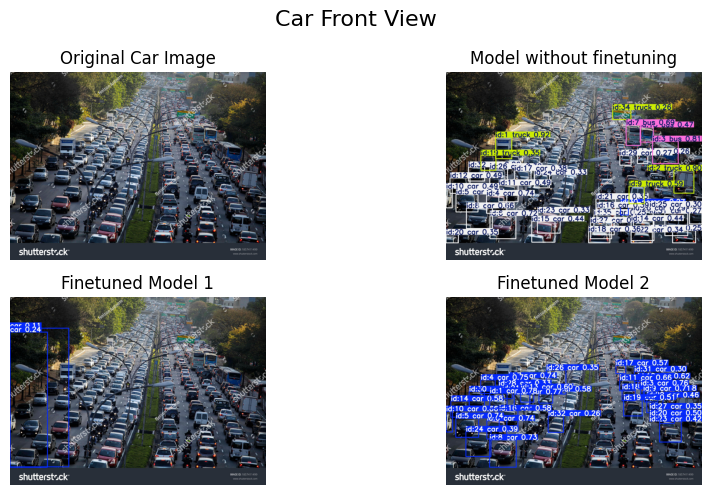

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[1])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(im1)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_im1)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_im2)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('Car Front View', fontsize=16)

plt.tight_layout()
plt.show()

In [9]:
im1 = mpimg.imread('/kaggle/working/runs/detect/track/occlusion-2.jpg')
model_im1 = mpimg.imread('/kaggle/working/runs/detect/track2/occlusion-2.jpg')
model_ft2_im2 = mpimg.imread('/kaggle/working/runs/detect/track3/occlusion-2.jpg')

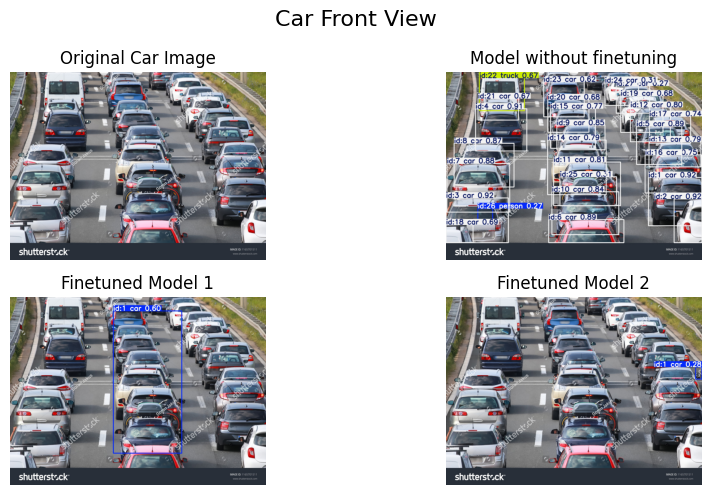

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[4])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(im1)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_im1)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_im2)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('Car Front View', fontsize=16)

plt.tight_layout()
plt.show()

In [11]:
im1 = mpimg.imread('/kaggle/working/runs/detect/track/occlusion-3.jpg')
model_im1 = mpimg.imread('/kaggle/working/runs/detect/track2/occlusion-3.jpg')
model_ft2_im2 = mpimg.imread('/kaggle/working/runs/detect/track3/occlusion-3.jpg')

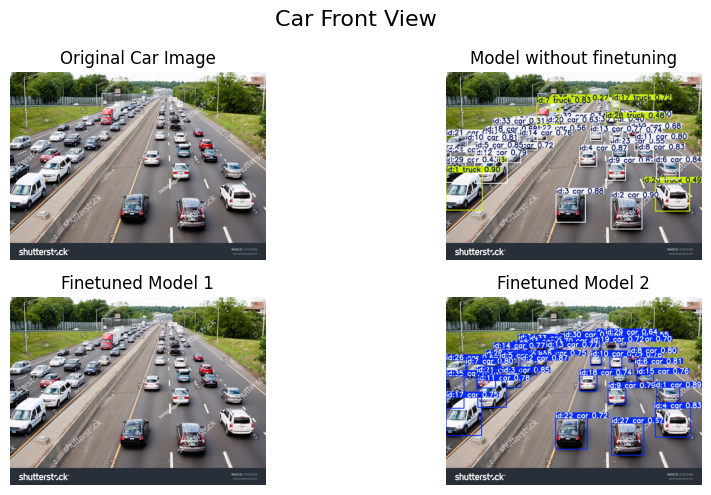

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[3])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(im1)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_im1)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_im2)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('Car Front View', fontsize=16)

plt.tight_layout()
plt.show()

In [13]:
im1 = mpimg.imread('/kaggle/working/runs/detect/track/occlusion-4.jpg')
model_im1 = mpimg.imread('/kaggle/working/runs/detect/track2/occlusion-4.jpg')
model_ft2_im2 = mpimg.imread('/kaggle/working/runs/detect/track3/occlusion-4.jpg')

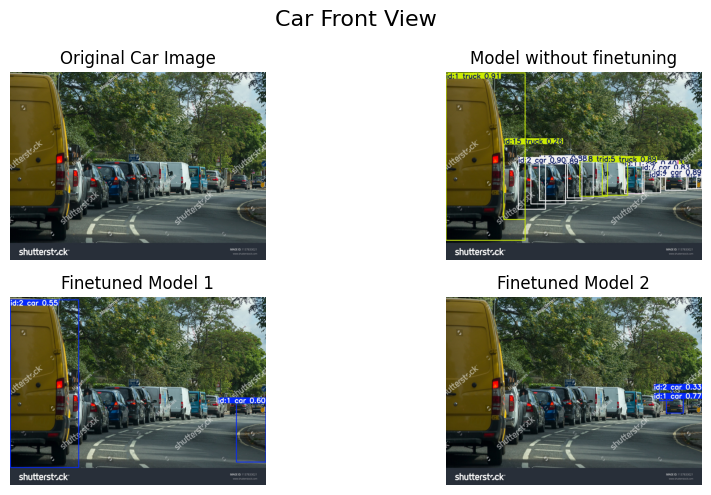

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[5])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(im1)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_im1)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_im2)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('Car Front View', fontsize=16)

plt.tight_layout()
plt.show()

In [15]:
im1 = mpimg.imread('/kaggle/working/runs/detect/track/occlusion-5.jpg')
model_im1 = mpimg.imread('/kaggle/working/runs/detect/track2/occlusion-5.jpg')
model_ft2_im2 = mpimg.imread('/kaggle/working/runs/detect/track3/occlusion-5.jpg')

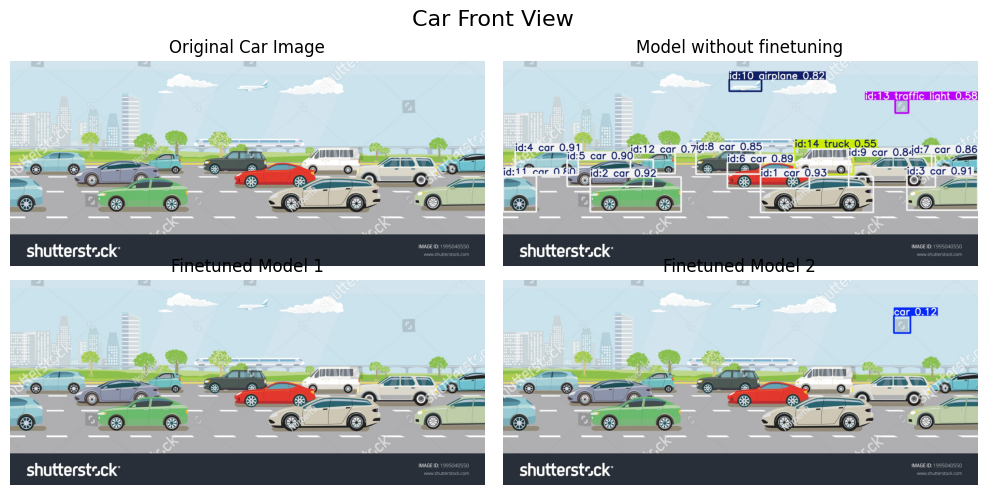

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[2])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(im1)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_im1)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_im2)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('Car Front View', fontsize=16)

plt.tight_layout()
plt.show()

In [17]:
im1 = mpimg.imread('/kaggle/working/runs/detect/track/occlusion-6.jpg')
model_im1 = mpimg.imread('/kaggle/working/runs/detect/track2/occlusion-6.jpg')
model_ft2_im2 = mpimg.imread('/kaggle/working/runs/detect/track3/occlusion-6.jpg')

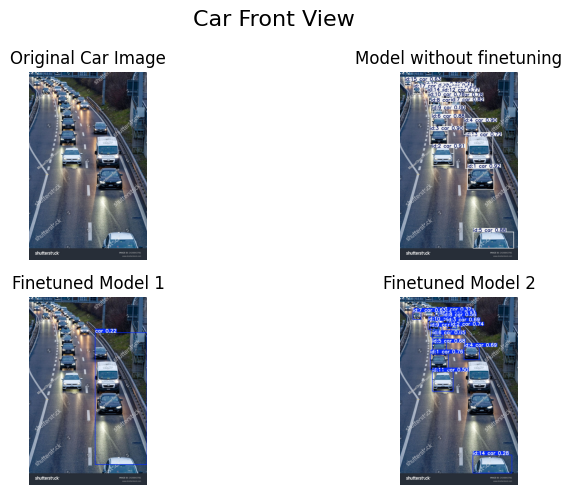

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[0])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(im1)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_im1)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_im2)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('Car Front View', fontsize=16)

plt.tight_layout()
plt.show()

In [19]:
im1 = mpimg.imread('/kaggle/working/runs/detect/track/occlusion-7.jpg')
model_im1 = mpimg.imread('/kaggle/working/runs/detect/track2/occlusion-7.jpg')
model_ft2_im2 = mpimg.imread('/kaggle/working/runs/detect/track3/occlusion-7.jpg')

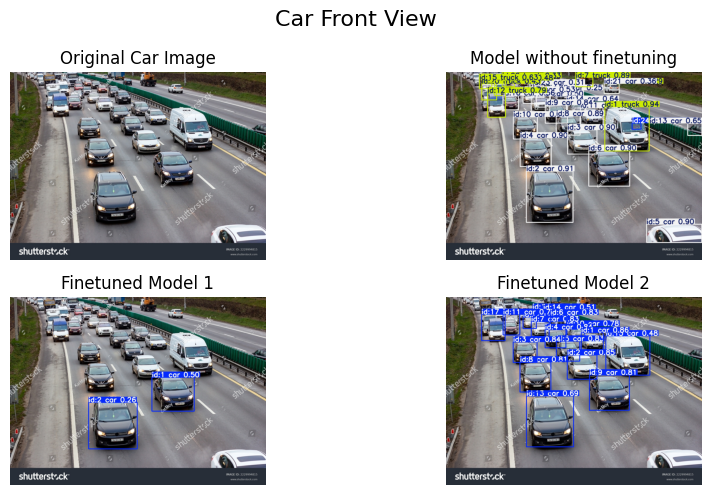

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0,0].imshow(images_list[6])
axes[0,0].axis('off')  
axes[0,0].set_title('Original Car Image') 

axes[0,1].imshow(im1)
axes[0,1].axis('off')
axes[0,1].set_title('Model without finetuning')

axes[1, 0].imshow(model_im1)
axes[1, 0].axis('off')
axes[1, 0].set_title('Finetuned Model 1')

axes[1, 1].imshow(model_ft2_im2)
axes[1, 1].axis('off')
axes[1, 1].set_title('Finetuned Model 2')

fig.suptitle('Car Front View', fontsize=16)

plt.tight_layout()
plt.show()